In [1]:
import SimRunner as sr
from infoenginessims.simprocedures import basic_simprocedures as sp
%load_ext jupyternotify
#this class hides many details. to see everything that is happening you must study the SimRunner.py file 
# as well as sus.kyle_tools.multisim
bfr = sr.BitFlipRunner()

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["animation.html"] = "jshtml"

from IPython.display import HTML
import matplotlib.animation as animation
%matplotlib inline

import importlib
import kyle_tools.heplerFunctionBitFlip as heplerFunctionBitFlip
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

In [3]:
#setting up parameters
# try to create a ParamGuider class from source.kyle_tools.multisim OR make your own similar class in order to 
# 'optimize' this bit flip. By optimize, I mean to find a protocol that has low work but also high fidelity.  
# Keep lambda at .5 but feel free to change the other parameters.

p_vals={}
p_vals['lambda']=0.5
p_vals['N'] = 1_000
p_vals['dt'] = 1/10_000
p_vals['k'] = np.pi**2
p_vals['tau'] = 1
p_vals['depth'] = 1
p_vals['location'] = 1
p_vals['noise'] = False

bfr.change_params(p_vals) # this is a method in SimManager, defined in multisim


In [4]:
bfr.run_sim() # defined in kyle_tools/multism.py


 initializing...
 found 1053 samples out of 1000
The as_tep is 20
The dt is 0.0001
This line is for the initializatoin of the simulation object.
<bound method RKDetermEulerStoch.update_state of <integrators.rkdeterm_eulerstoch.RKDetermEulerStoch object at 0x7fb92ec120d0>> [<infoenginessims.simprocedures.basic_simprocedures.ReturnFinalState object at 0x7fb92ec06d60>, <infoenginessims.simprocedures.basic_simprocedures.TerminateOnMean object at 0x7fb92aac6b50>, <infoenginessims.simprocedures.basic_simprocedures.MeasureAllState object at 0x7fb92ec12640>, <infoenginessims.simprocedures.trajectory_measurements.CountJumps object at 0x7fb92ec12880>] 10000 0.0001

 running sim...
9901 10000
9902 10000
9903 10000
9904 10000
9905 10000
9906 10000
9907 10000
9908 10000
9909 10000
9910 10000
9911 10000
9912 10000
9913 10000
9914 10000
9915 10000
9916 10000
9917 10000
9918 10000
9919 10000
9920 10000
9921 10000
9922 10000
9923 10000
9924 10000
9925 10000
9926 10000
9927 10000
9928 10000
9929 10000


In [5]:
all_state = bfr.sim.output.all_state["states"]

## location of the particles

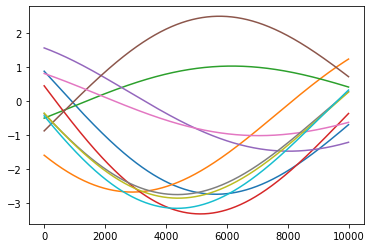

In [15]:
for x in range(number_of_particles)[0::100]:
    plt.plot(all_state[x, :, :, 1])

In [6]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)
energy_time_series = heplerFunctionBitFlip.get_energy_time_series(bfr, all_state)
number_of_particles = bfr.sim.ntrials

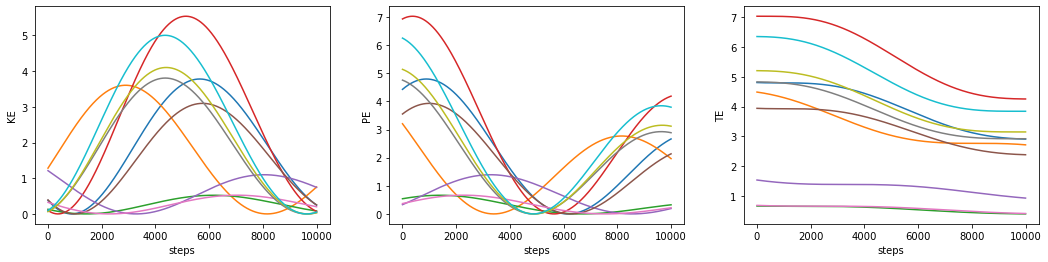

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

steps = 100

ax[0].set_xlabel("steps")
ax[0].set_ylabel("KE")   
for x in range(number_of_particles)[0::steps]:
    ax[0].plot(energy_time_series[x, :, :, 0])

ax[1].set_xlabel("steps")
ax[1].set_ylabel("PE")   
for x in range(number_of_particles)[0::steps]:
    ax[1].plot(energy_time_series[x, :, :, 1]) # PE graph

ax[2].set_xlabel("steps")
ax[2].set_ylabel("TE")   
for x in range(number_of_particles)[0::steps]:
    ax[2].plot(energy_time_series[x, :, :, 2]) # TE graph

plt.show()

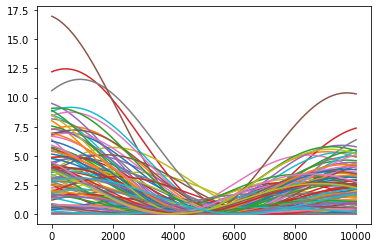

In [9]:
for x in range(number_of_particles)[0::10]:
    plt.plot(energy_time_series[x, :, :, 1])

In [12]:
final_W = bfr.sim.output.final_W

(array([59., 26., 18., 25., 13.,  9., 16., 16., 14., 11., 16., 14., 13.,
        11., 10., 13., 12., 17.,  3., 15., 22., 11., 23., 13., 22., 20.,
        21., 15., 17., 20., 18., 17., 12., 15., 19., 28., 13., 26., 26.,
        15., 29., 26., 26., 23., 19., 30., 33., 26., 47., 37.]),
 array([-2.40878169e-04,  5.95401128e-02,  1.19321104e-01,  1.79102095e-01,
         2.38883086e-01,  2.98664077e-01,  3.58445067e-01,  4.18226058e-01,
         4.78007049e-01,  5.37788040e-01,  5.97569031e-01,  6.57350022e-01,
         7.17131013e-01,  7.76912004e-01,  8.36692995e-01,  8.96473986e-01,
         9.56254977e-01,  1.01603597e+00,  1.07581696e+00,  1.13559795e+00,
         1.19537894e+00,  1.25515993e+00,  1.31494092e+00,  1.37472191e+00,
         1.43450290e+00,  1.49428390e+00,  1.55406489e+00,  1.61384588e+00,
         1.67362687e+00,  1.73340786e+00,  1.79318885e+00,  1.85296984e+00,
         1.91275083e+00,  1.97253182e+00,  2.03231281e+00,  2.09209380e+00,
         2.15187480e+00,  2.2116

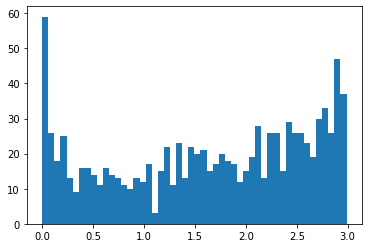

In [13]:
plt.hist(final_W, bins = 50)

In [146]:
max_W = max(final_W)
min_W = min(final_W)
print(f"The max work is {max(final_W)} and the min work is {min(final_W)}")

unmodified_jarzyn = np.mean(np.exp(-final_W))
print(f"The unmodified jarzynski term is ", unmodified_jarzyn)

modified_jarzyn = np.mean(np.exp(-np.sort(final_W)[1:]))
print(f"after removing the most negative term, I get ", modified_jarzyn)

The max work is 6.918227128699187 and the min work is -5.166004582867114
The unmodified jarzynski term is  1.090817417516401
after removing the most negative term, I get  0.9165205515118064


In [139]:
print("The most negative 5 work done is:")
print(sorted(final_W)[0:5])

The most negative 5 work done is:
[-5.166004582867114, -3.9540323915713227, -3.823458861381564, -3.7601839853388475, -3.118858709546322]


In [5]:
fidelity_rate = heplerFunctionBitFlip.evaluateFidelityRate(bfr.sim.output.all_state["states"])
print(fidelity_rate)

100.0


In [19]:
def store_potential(d=1, l=1):
    a = d/l**4
    b = -4 * d/l**2
    x_range = np.linspace(-1.5, 1.5, 1000)
    V_array = a * x_range**4 + b/2 * x_range**2
    plt.plot(x_range, V_array)
    
def comp_potential(k = np.pi**2):
    x_range = np.linspace(-1.5, 1.5, 1000)
    V_array = 1/2 * k * x_range**2
    plt.plot(x_range, V_array)
    

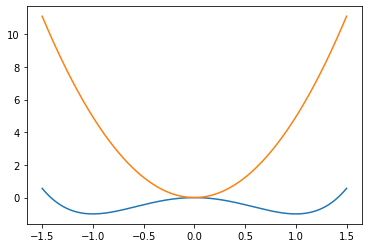

In [21]:
store_potential()
comp_potential()

In [41]:
init_state = bfr.sim.initial_state
final_state = bfr.sim.output.final_state

In [46]:
steps = slice(0, 4)
test_init_state  = init_state[steps, ...]
test_final_state = final_state[steps, ...]

In [47]:
test_comp_V_init = bfr.system.get_potential(test_init_state, 0)
test_store_V_init = bfr.eq_system.get_potential(test_init_state, 0)
U_0 = test_comp_V_init - test_store_V_init
print(test_comp_V_init, test_store_V_init, U_0)

test_comp_V_final = bfr.system.get_potential(test_final_state, 0)
test_store_V_final = bfr.eq_system.get_potential(test_final_state, 0)
U_1 = test_store_V_final - test_comp_V_final
print(test_comp_V_final, test_store_V_final, U_1)

final_work_done = U_0 + U_1
print(final_work_done)

[4.42691271 6.21888894 9.68118922 9.27489017] [-0.98940749 -0.93229056 -0.07490402 -0.2265049 ] [5.4163202  7.1511795  9.75609324 9.50139508]
[2.66484715 3.76510351 5.8956739  5.57663309] [-0.78841006 -0.94381654 -0.96208672 -0.98308384] [-3.45325721 -4.70892004 -6.85776062 -6.55971693]
[1.96306299 2.44225946 2.89833261 2.94167814]


# single sweep

In [48]:
# override only collecting 200 states 
bfr.procs[2] = sp.MeasureAllState()

In [49]:
%%notify
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    #"dt":       [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000],
    "dt":       1/5_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}
bfr.change_params(sweepObject)
bfr.run_sim(verbose=True)



 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10076 samples out of 10000
 running sim...

 analyzing output...


<IPython.core.display.Javascript object>

# verification of the precision of the simulation for dt = 1/1_000
- In the following section, I will assess the accuracy of the simulation's position with dt = 1/1_000. 
- The precision of the work done is heavily dependent on the accuracy of the position, as the evaluation of work done involves comparing the potential energy before and after the protocol.

## (a) position evaluation (compare with the analytic solution)

The solution of a damped oscillator is 
$$x(t) = C_1 exp(-\alpha t) cos(\gamma t) + C_2 exp(-\alpha t) sin(\Omega t)$$
$$v(t) = exp(-\alpha t) [(C_1 \alpha + C_2 \Omega) cos(\Omega t) - (C_1 \Omega + C_2 \alpha) sin(\Omega t)]$$
$$\alpha = \lambda/2, \Omega = \sqrt{k - \alpha^2}$$
$$C_1 = x_0, C_2 = \frac{v_0 + x_0 \alpha}{\Omega}$$

## conclusion:
- We find that the max error in the position is about 1e-2

In [12]:
# set up parameters and time
alpha = sweepObject["lambda"]/2
omega_1 = np.sqrt(sweepObject["k"] - alpha**2)
t = np.pi / np.sqrt(sweepObject["k"])

In [377]:
# get the final_state and analytic_final_state
initial_state = bfr.sim.initial_state
final_state = bfr.sim.output.final_state

# calculate the analytical final states
analytic_final_state = final_state.copy()

C_1 = initial_state[:, :, 0]
C_2 = (initial_state[:, :, 1] + initial_state[:, :, 0] * alpha)/omega_1
analytic_final_state[:, :, 0] = np.exp(-alpha * t) * (C_1 * np.cos(omega_1 * t) + C_2 * np.sin(omega_1 * t))
analytic_final_state[:, :, 1] = np.exp(-alpha * t) * ((C_1 * -alpha + C_2 * omega_1) * np.cos(omega_1 * t) - \
                                                      (C_1 * omega_1 + C_2 * alpha) * np.sin(omega_1 * t))

In [378]:
position_error = analytic_final_state[:, :, 0] - final_state[:, :, 0]
velocity_error = analytic_final_state[:, :, 1] - final_state[:, :, 1]

In [379]:
# the maximum error of the position
print(max(np.abs(position_error)), max(np.abs(velocity_error)))


[1.48769885e-14] [3.64153152e-14]


In [380]:
len(bfr.sim.output.final_W)

10000

# (b) work done evaluation
- In this section, I want to compare the result of the work done calculated from the simulation and the analytic solution.

conclusion:
- The difference in mean work done are small

In [381]:
final_W = bfr.sim.output.final_W

# work done from analytic solution
U0 = bfr.system.get_potential(initial_state, 0) - bfr.eq_system.get_potential(analytic_final_state, 0)
UF = bfr.eq_system.get_potential(final_state, 0) - bfr.system.get_potential(analytic_final_state, 0)
analytical_final_W = U0 + UF

print("The mean work done of the simulation result is:", np.mean(final_W))
print("The mean work done of the analytical result is:", np.mean(analytical_final_W))

The mean work done of the simulation result is: 1.5934798583212757
The mean work done of the analytical result is: 1.6156491813272398


# (c) Flip evaluation

In this section, I use the initial and final states to evaluate the fidelity rate of the system. 

## conclusion:
- I found that the fidelity rate is high.
- The bad bits are the one with small initial position.  

In [382]:
initial_bit_value = np.sign(initial_state[:,:,0])
final_bit_value = np.sign(final_state[:, :, 0])

# to get the index of good bits and bad bits
fidelity_index = (initial_bit_value != final_bit_value)
infidelity_index = (initial_bit_value == final_bit_value)

In [383]:
fidelity_rate = np.sum(fidelity_index) / len(initial_bit_value) * 100
print("The fidelity rate is ", fidelity_rate) 

The fidelity rate is  99.97


# (d) checking fluctuation theorem

- The Jarzynski equation is ⟨exp(−βW)⟩ = exp(−βΔF)
- ∆F = 0 as the initial potential and final potentials are the same and thus the parition functions are the same.

In [147]:
final_W = bfr.sim.output.final_W
np.mean(np.exp(-final_W))

1.090817417516401

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  1.,  0.,  3.,  6.,
         5.,  0.,  5.,  5.,  4.,  8.,  3.,  7.,  8., 11., 11., 14., 13.,
        14., 15., 27., 32., 26., 38., 31., 16., 31., 22., 29., 23., 28.,
        31., 19., 28., 34., 24., 21., 29., 28., 12., 23., 26., 17., 22.,
        15., 17., 12., 15., 20.,  9., 20., 16., 13., 10., 12., 10.,  8.,
         9., 10.,  6.,  4.,  8.,  3.,  4.,  4.,  0.,  3.,  1.,  4.,  1.,
         1.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  1.]),
 array([-5.16600458, -5.04516227, -4.92431995, -4.80347763, -4.68263531,
        -4.561793  , -4.44095068, -4.32010836, -4.19926605, -4.07842373,
        -3.95758141, -3.83673909, -3.71589678, -3.59505446, -3.47421214,
        -3.35336983, -3.23252751, -3.11168519, -2.99084287, -2.87000056,
        -2.74915824, -2.62831592, -2.50747361, -2.38663129, -2.26578897,
        -2.14494665, -2.02410434, -1.90326202, -1.7824197 , -1.661577

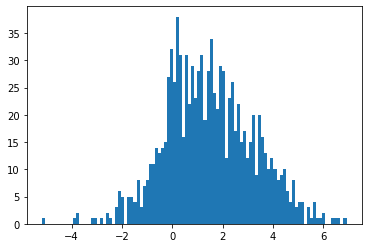

In [90]:
plt.hist(final_W, bins = 100)

naive jarzynski: average of exp -Beta W is 1.090817417516401
binned jarzynski: binned average of exp -Beta W using only values of work where we have +W and -W realizations: 1.0993638458259118
this means ignoring 1.7 percent of trials


/Users/edwardtang/Project/source/kyle_tools/fluctuation_theorems.py:103: RuntimeWarning: divide by zero encountered in true_divide
  log_ratio = np.log(np.divide(pos_counts, neg_counts))


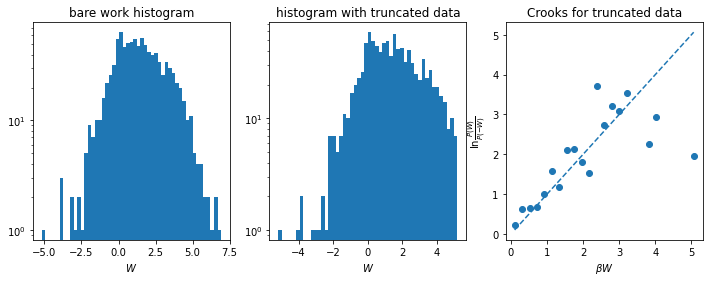

(array([0.10332009, 0.30996027, 0.51660046, 0.72324064, 0.92988082,
        1.13652101, 1.34316119, 1.54980137, 1.75644156, 1.96308174,
        2.16972192, 2.37636211, 2.58300229, 2.78964247, 2.99628266,
        3.20292284, 3.40956302, 3.61620321, 3.82284339, 4.02948357,
        4.23612376, 4.44276394, 4.64940412, 4.85604431, 5.06268449]),
 [array([47, 26, 23, 20, 17, 10, 11,  7,  5,  7,  7,  1,  2,  1,  1,  1,  0,
          0,  2,  1,  0,  0,  0,  0,  1]),
  array([59, 49, 44, 39, 47, 49, 36, 57, 42, 43, 32, 41, 31, 25, 22, 34, 23,
         27, 19, 19, 16, 14,  8, 10,  7])])

In [148]:
crooks_analysis_tsp(final_W)

In [8]:
def get_analytical_final_state(initial_state):
    # this function is for underdamped situation
    analytic_final_state = initial_state.copy()
    C_1 = initial_state[:, :, 0]
    C_2 = (initial_state[:, :, 1] + initial_state[:, :, 0] * alpha)/omega_1
    analytic_final_state[:, :, 0] = np.exp(-alpha * t) * (C_1 * np.cos(omega_1 * t) + C_2 * np.sin(omega_1 * t))
    analytic_final_state[:, :, 1] = np.exp(-alpha * t) * ((C_1 * -alpha + C_2 * omega_1) * np.cos(omega_1 * t) - \
                                                          (C_1 * omega_1 + C_2 * alpha) * np.sin(omega_1 * t))
    return analytic_final_state

# MultiTest: Time sweep analysis

In [5]:
%%notify
dt_list = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000, 1/60_000, 1/80_000, 
           1/90_000, 1/100_000]
 

for dt in dt_list:
    sweepObject = {
        "lambda":   0.5,
        "N":        5_000,
        "dt":       dt,
        "k":        np.pi**2,
        "tau":      1,
        "depth":    1,
        "location": 1
    }
    bfr.change_params(sweepObject)
    bfr.run_sim(verbose=True)
    initial_position = bfr.sim.initial_state
    final_position = bfr.sim.output.final_state
    work_done = bfr.sim.output.final_W
    
    np.save(f"x_position_with_dt_{dt}_(with_dapming_no_noise).npy", np.asarray([initial_position, final_position]))
    np.save(f"work_done_with_dt_{dt}_(with_dapming_no_noise).npy", np.asarray(work_done))


 initializing...
 found 5028 samples out of 5000
The as_tep is 2
The dt is 0.001
This line is for the initializatoin of the simulation object.
<bound method RKDetermEulerStoch.update_state of <integrators.rkdeterm_eulerstoch.RKDetermEulerStoch object at 0x7fb91e703c40>> [<infoenginessims.simprocedures.basic_simprocedures.ReturnFinalState object at 0x7fb92aa88b20>, <infoenginessims.simprocedures.basic_simprocedures.TerminateOnMean object at 0x7fb92aae61f0>, <infoenginessims.simprocedures.basic_simprocedures.MeasureAllState object at 0x7fb91e703be0>, <infoenginessims.simprocedures.trajectory_measurements.CountJumps object at 0x7fb92ec06dc0>] 1000 0.001

 running sim...
901 1000
902 1000
903 1000
904 1000
905 1000
906 1000
907 1000
908 1000
909 1000
910 1000
911 1000
912 1000
913 1000
914 1000
915 1000
916 1000
917 1000
918 1000
919 1000
920 1000
921 1000
922 1000
923 1000
924 1000
925 1000
926 1000
927 1000
928 1000
929 1000
930 1000
931 1000
932 1000
933 1000
934 1000
935 1000
936 1000

29989 30000
29990 30000
29991 30000
29992 30000
29993 30000
29994 30000
29995 30000
29996 30000
29997 30000
29998 30000
29999 30000

 analyzing output...

 initializing...
 found 5034 samples out of 5000
The as_tep is 80
The dt is 2.5e-05
This line is for the initializatoin of the simulation object.
<bound method RKDetermEulerStoch.update_state of <integrators.rkdeterm_eulerstoch.RKDetermEulerStoch object at 0x7fb91e710ac0>> [<infoenginessims.simprocedures.basic_simprocedures.ReturnFinalState object at 0x7fb91e710280>, <infoenginessims.simprocedures.basic_simprocedures.TerminateOnMean object at 0x7fb91e710310>, <infoenginessims.simprocedures.basic_simprocedures.MeasureAllState object at 0x7fb91e710a60>, <infoenginessims.simprocedures.trajectory_measurements.CountJumps object at 0x7fb91e710250>] 40000 2.5e-05

 running sim...
39901 40000
39902 40000
39903 40000
39904 40000
39905 40000
39906 40000
39907 40000
39908 40000
39909 40000
39910 40000
39911 40000
39912 40000
39913 40000
39914 4

89901 90000
89902 90000
89903 90000
89904 90000
89905 90000
89906 90000
89907 90000
89908 90000
89909 90000
89910 90000
89911 90000
89912 90000
89913 90000
89914 90000
89915 90000
89916 90000
89917 90000
89918 90000
89919 90000
89920 90000
89921 90000
89922 90000
89923 90000
89924 90000
89925 90000
89926 90000
89927 90000
89928 90000
89929 90000
89930 90000
89931 90000
89932 90000
89933 90000
89934 90000
89935 90000
89936 90000
89937 90000
89938 90000
89939 90000
89940 90000
89941 90000
89942 90000
89943 90000
89944 90000
89945 90000
89946 90000
89947 90000
89948 90000
89949 90000
89950 90000
89951 90000
89952 90000
89953 90000
89954 90000
89955 90000
89956 90000
89957 90000
89958 90000
89959 90000
89960 90000
89961 90000
89962 90000
89963 90000
89964 90000
89965 90000
89966 90000
89967 90000
89968 90000
89969 90000
89970 90000
89971 90000
89972 90000
89973 90000
89974 90000
89975 90000
89976 90000
89977 90000
89978 90000
89979 90000
89980 90000
89981 90000
89982 90000
89983 90000
8998

<IPython.core.display.Javascript object>

# precision test
- In the following section, I compare the result of the simulation and the analytic solution to see how large the error in the position will be. 
- I used the time steps for dt = [0.001, 0.0002, 0.0001, 2e-05, 1e-05]
- I found that as time steps are too small, the error in position can grow up to 1e-5
- the error may be come from the integrator.

## (a) precision of the position (comparing with the analytic solution)

In [13]:
def createErrorPrecisionList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(with_dapming_no_noise).npy")
    initial_state = data[0]
    final_state = data[1]
    analytic_final_state = get_analytical_final_state(initial_state)
    max_error_for_x = max(np.abs(final_state[:, :, 0] - analytic_final_state[:, :, 0]))[0]
    max_error_for_v = max(np.abs(final_state[:, :, 1] - analytic_final_state[:, :, 1]))[0]
    plt.hist(np.abs(final_state[:, :, 0] - analytic_final_state[:, :, 0]))
    plt.show()
    plt.hist(np.abs(final_state[:, :, 1] - analytic_final_state[:, :, 1]))
    plt.show()
    return (_dt, max_error_for_x, max_error_for_v)

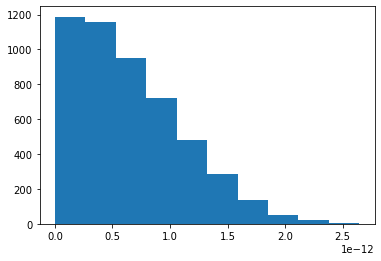

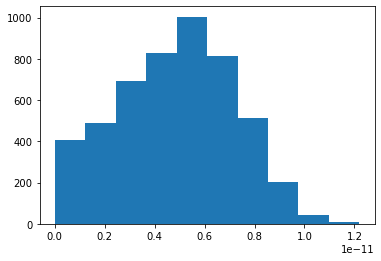

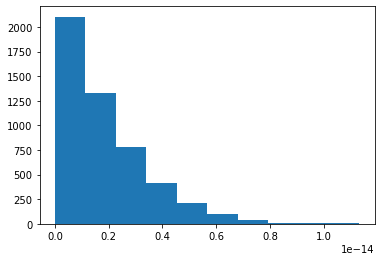

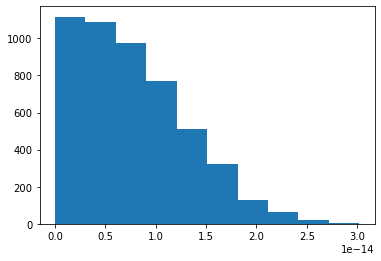

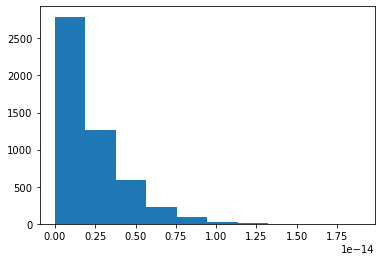

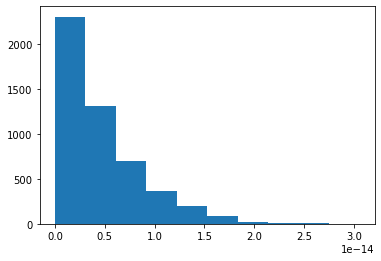

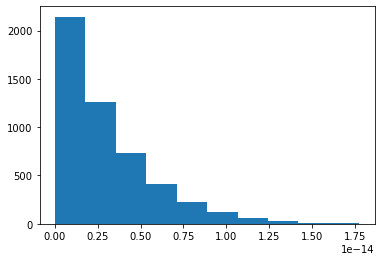

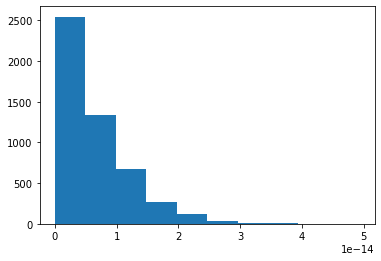

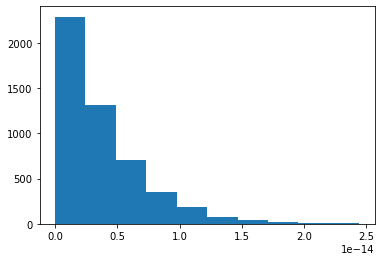

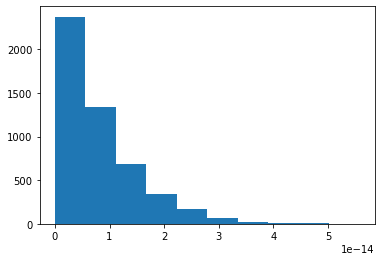

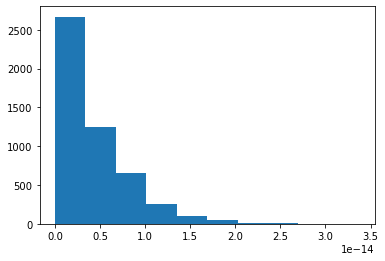

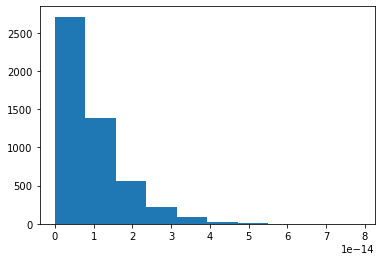

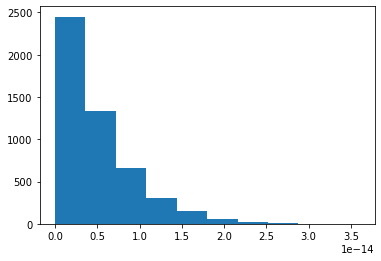

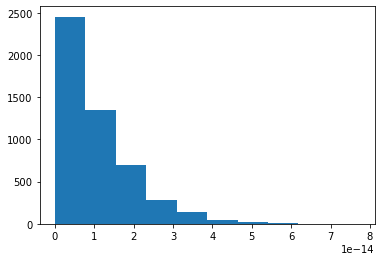

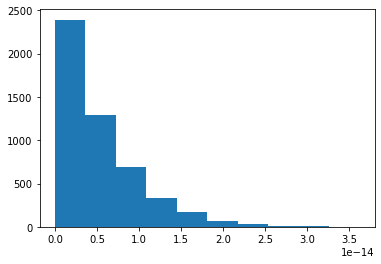

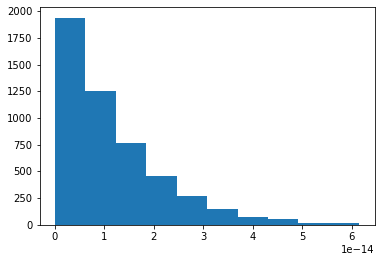

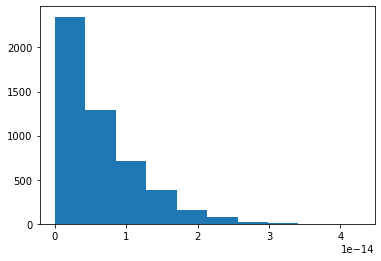

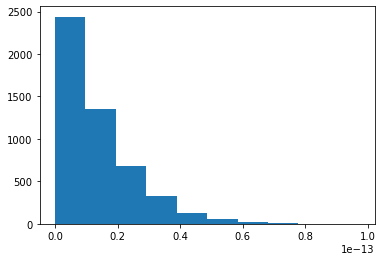

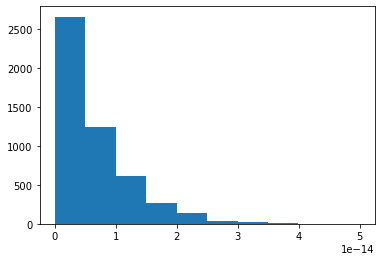

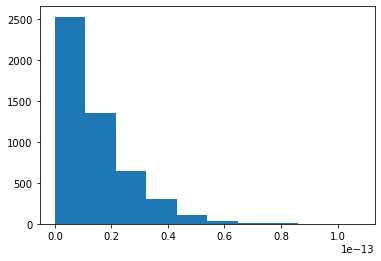

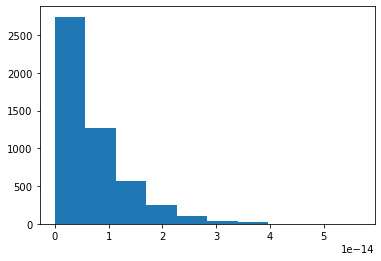

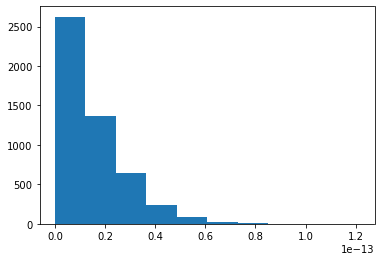

In [14]:
position_error_list = np.asarray([createErrorPrecisionList(_dt) for _dt in dt_list])

In [15]:
position_error_list

array([[1.00000000e-03, 2.64488431e-12, 1.21951338e-11],
       [2.00000000e-04, 1.13242749e-14, 3.01980663e-14],
       [1.00000000e-04, 1.88737914e-14, 3.05311332e-14],
       [5.00000000e-05, 1.77635684e-14, 4.92939023e-14],
       [3.33333333e-05, 2.44249065e-14, 5.57331958e-14],
       [2.50000000e-05, 3.37507799e-14, 7.86037901e-14],
       [2.00000000e-05, 3.59712260e-14, 7.72715225e-14],
       [1.66666667e-05, 3.61932706e-14, 6.15063556e-14],
       [1.25000000e-05, 4.26325641e-14, 9.72555370e-14],
       [1.11111111e-05, 4.99600361e-14, 1.07691633e-13],
       [1.00000000e-05, 5.66213743e-14, 1.21458399e-13]])

In [16]:
position_error_list[:, 0]

array([1.00000000e-03, 2.00000000e-04, 1.00000000e-04, 5.00000000e-05,
       3.33333333e-05, 2.50000000e-05, 2.00000000e-05, 1.66666667e-05,
       1.25000000e-05, 1.11111111e-05, 1.00000000e-05])

[  1000.   5000.  10000.  20000.  30000.  40000.  50000.  60000.  80000.
  90000. 100000.]


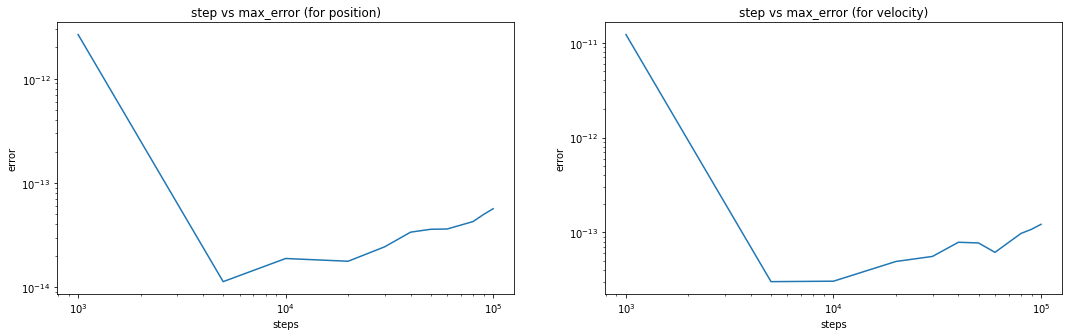

In [17]:
print(1/position_error_list[:, 0])
fig, ax = plt.subplots(1, 2, figsize=(18,5))
ax[0].set_title("step vs max_error (for position)")
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlabel("steps")
ax[0].set_ylabel("error")
ax[0].plot(1/position_error_list[:, 0], position_error_list[:, 1])

ax[1].set_title("step vs max_error (for velocity)")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("steps")
ax[1].set_ylabel("error")

ax[1].plot(1/position_error_list[:, 0], position_error_list[:, 2])
plt.show()

## (a2) energy test

In [205]:
def createEnergyPrecisionList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(with_dapming_no_noise).npy")
    initial_state = data[0]
    final_state = data[1]
    
    initial_v = initial_state[:, :, 1]
    final_v = final_state[:, :, 1]
    
    initial_KE = 1/2 * initial_v**2
    final_KE   = 1/2 * final_v**2
    initial_PE = bfr.system.get_potential(initial_state, 0).reshape(-1, 1)
    final_PE   = bfr.system.get_potential(final_state, 0).reshape(-1, 1)
    
    
    inital_TE = initial_KE + initial_PE
    final_TE = final_KE + final_PE
    
    return final_TE - inital_TE



In [208]:
# initial TE and final TE are not the same?
createEnergyPrecisionList(dt_list[3])

array([[-1.71844481],
       [-2.53344847],
       [-2.06569505],
       ...,
       [-3.09510264],
       [-1.87269693],
       [-3.918527  ]])

## (b) precision of the fidelity
- conclusion: The fidelity is very good in this situation.

In [211]:
def createFidelityList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(with_dapming_no_noise).npy")
    initial_x_bit = np.sign(data[0][:, :, 0])
    final_x_bit = np.sign(data[1][:, :, 0])

    
    total_number_of_bit = len(initial_x_bit)
    bad_bits = np.sum(initial_x_bit == final_x_bit)
    good_bits = np.sum(initial_x_bit != final_x_bit)
    
    return (1/_dt, good_bits / total_number_of_bit)

fidelityDataArray = [createFidelityList(_dt) for _dt in dt_list]

In [212]:
fidelityDataArray

[(1000.0, 0.9993),
 (5000.0, 0.9992),
 (10000.0, 0.9998),
 (20000.0, 0.9997),
 (30000.0, 0.9994),
 (40000.0, 0.9996),
 (49999.99999999999, 0.9994),
 (60000.0, 0.9997),
 (80000.0, 0.9997),
 (90000.0, 0.9998),
 (99999.99999999999, 0.9994)]

## (c) work done analysis
- check the Jarzynski term

In [332]:
def createWorkDoneList(_dt, _filter = False, _delta = 0):
    work_done = np.load(f"bit_flip_np_data/work_done_with_dt_{_dt}_(with_dapming_no_noise).npy")
    mean_work_done = np.mean(work_done)
    
    
    if _filter == True:
        upperLimit_index = work_done < mean_work_done + _delta
        lowerLimit_index = work_done > mean_work_done - _delta
        combinedIndex = np.logical_and(upperLimit_index, lowerLimit_index)
        work_done = work_done[combinedIndex]
    
    N = len(work_done)
    fluctuation = mean_work_done / np.sqrt(N)
    jarzynski_term = np.mean(np.exp(-work_done))
    
    if _filter == True:
        return (_dt, mean_work_done, fluctuation, jarzynski_term, _delta)
    else:
        return (_dt, mean_work_done, fluctuation, jarzynski_term)

In [333]:
# 0: dt, 1L mean_work_done, 2: fluctuation, 3: jarzynski_term)
_filter = True
workDoneDataArray = np.asarray([createWorkDoneList(_dt, _filter = False, _delta = _detla) \
                                for _dt in dt_list])

print("0: dt, step, 1: mean_work_done, 2: fluctuation, 3: jarzynski_term")
workDoneDataArray

0: dt, step, 1: mean_work_done, 2: fluctuation, 3: jarzynski_term


array([[1.00000000e-03, 1.59445265e+00, 1.59445265e-02, 3.11951554e-01],
       [2.00000000e-04, 1.57356930e+00, 1.57356930e-02, 3.17493376e-01],
       [1.00000000e-04, 1.59260993e+00, 1.59260993e-02, 3.14605431e-01],
       [5.00000000e-05, 1.61168624e+00, 1.61168624e-02, 3.06958854e-01],
       [3.33333333e-05, 1.60038805e+00, 1.60038805e-02, 3.11071028e-01],
       [2.50000000e-05, 1.58514009e+00, 1.58514009e-02, 3.14207107e-01],
       [2.00000000e-05, 1.58469624e+00, 1.58469624e-02, 3.11825480e-01],
       [1.66666667e-05, 1.60839019e+00, 1.60839019e-02, 3.06961778e-01],
       [1.25000000e-05, 1.60394186e+00, 1.60394186e-02, 3.08820031e-01],
       [1.11111111e-05, 1.58479564e+00, 1.58479564e-02, 3.17311863e-01],
       [1.00000000e-05, 1.58308429e+00, 1.58308429e-02, 3.14638685e-01]])

In [92]:
from kyle_tools.fluctuation_theorems import crooks_analysis_tsp

naive jarzynski: average of exp -Beta W is 1.090817417516401
binned jarzynski: binned average of exp -Beta W using only values of work where we have +W and -W realizations: 1.0993638458259118
this means ignoring 1.7 percent of trials


/Users/edwardtang/Project/source/kyle_tools/fluctuation_theorems.py:103: RuntimeWarning: divide by zero encountered in true_divide
  log_ratio = np.log(np.divide(pos_counts, neg_counts))


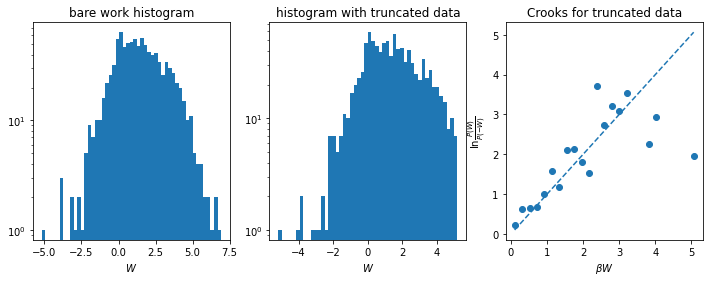

(array([0.10332009, 0.30996027, 0.51660046, 0.72324064, 0.92988082,
        1.13652101, 1.34316119, 1.54980137, 1.75644156, 1.96308174,
        2.16972192, 2.37636211, 2.58300229, 2.78964247, 2.99628266,
        3.20292284, 3.40956302, 3.61620321, 3.82284339, 4.02948357,
        4.23612376, 4.44276394, 4.64940412, 4.85604431, 5.06268449]),
 [array([47, 26, 23, 20, 17, 10, 11,  7,  5,  7,  7,  1,  2,  1,  1,  1,  0,
          0,  2,  1,  0,  0,  0,  0,  1]),
  array([59, 49, 44, 39, 47, 49, 36, 57, 42, 43, 32, 41, 31, 25, 22, 34, 23,
         27, 19, 19, 16, 14,  8, 10,  7])])

In [93]:
crooks_analysis_tsp(final_W)

In [334]:
dt_list[3]

5e-05

In [335]:
# 0: dt = , 1: mean_work_done, 2: fluctuation, 3: jarzynski_term, 4: delta)
_filter = True
_deltaList = np.linspace(0.01, 4, 100)
_dt = dt_list[3]
print(_dt)
workDoneDataArray = np.asarray([createWorkDoneList(_dt, _filter = True, _delta = _d) \
                                for _d in _deltaList])

# print("0: dt, 1L mean_work_done, 2: fluctuation, 3: jarzynski_term, 4: delta")
# workDoneDataArray

5e-05


In [340]:
workDoneDataArray

array([[5.00000000e-05, 1.61168624e+00, 2.40255999e-01, 1.99298941e-01,
        1.00000000e-02],
       [5.00000000e-05, 1.61168624e+00, 9.84494062e-02, 1.99860405e-01,
        5.03030303e-02],
       [5.00000000e-05, 1.61168624e+00, 6.89738037e-02, 1.99638141e-01,
        9.06060606e-02],
       [5.00000000e-05, 1.61168624e+00, 5.71247042e-02, 1.99608266e-01,
        1.30909091e-01],
       [5.00000000e-05, 1.61168624e+00, 5.02671127e-02, 1.99863242e-01,
        1.71212121e-01],
       [5.00000000e-05, 1.61168624e+00, 4.46829512e-02, 2.00142356e-01,
        2.11515152e-01],
       [5.00000000e-05, 1.61168624e+00, 4.13252882e-02, 1.99708310e-01,
        2.51818182e-01],
       [5.00000000e-05, 1.61168624e+00, 3.83300484e-02, 2.00482792e-01,
        2.92121212e-01],
       [5.00000000e-05, 1.61168624e+00, 3.61016331e-02, 2.00499074e-01,
        3.32424242e-01],
       [5.00000000e-05, 1.61168624e+00, 3.39697813e-02, 1.99782027e-01,
        3.72727273e-01],
       [5.00000000e-05, 1.6116

mean work done = 1.6116862399818686


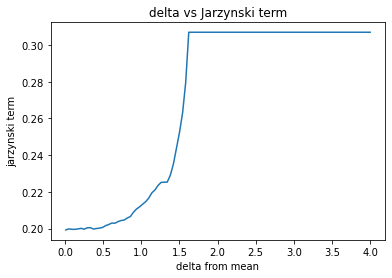

In [346]:
print(f"mean work done = {workDoneDataArray[0][1]}")

plt.title("delta vs Jarzynski term")
plt.xlabel("delta from mean")
plt.ylabel("jarzynski term")
plt.plot(workDoneDataArray[:, -1], np.abs(workDoneDataArray[:, -2]))

# dt_sweep

In [11]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    #"dt":       [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000],
    "dt":       [1/500_000, 1/1_000_000],
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}

parameter = "dt"
label = "dt_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/2) ==========
lambda_0.5_N_10000_dt_2e-06_k_9.8696_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10033 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.591656192260792
========== finished (1/2) ==========
========== start (2/2) ==========
lambda_0.5_N_10000_dt_1e-06_k_9.8696_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10032 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.5905063331950529
========== finished (2/2) ==========


dt_sweep
[0.001, 0.0002, 0.0001, 2e-05, 1e-05]
[100.0, 100.0, 100.0, 100.0, 100.0]
[1.584647149660738, 1.5871545752225018, 1.587769756067623, 1.6011414678097349, 1.5957725540261338]


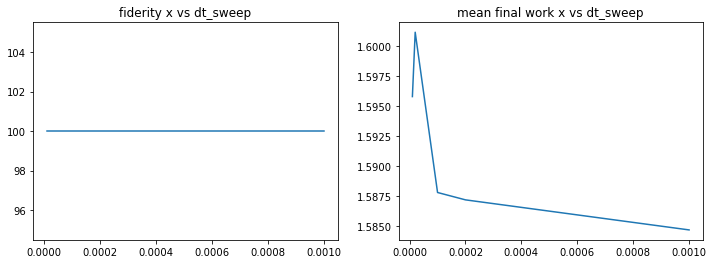

In [10]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# k_sweep

In [69]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.linspace(1, 10, 9),
    "tau":      1,
    "depth":    1,
    "location": 1
    
}

parameter = "k"
label = "k_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_1_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (1.0, 1.0)]
 found 10027 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 98.5
meanFinalWork = 0.6257530770394865
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_2.125_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (2.125, 2.125)]
 found 10005 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 99.5
meanFinalWork = 0.7337714366442192
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_3.25_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (3.25, 3.25)]
 found 10037 samples out of 10000
 running sim...

 analyzing output...
fidelity_

k_sweep
[1.0, 2.125, 3.25, 4.375, 5.5, 6.625, 7.75, 8.875, 10.0]
[97.5, 98.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.5, 100.0]
[0.6272282846859902, 0.7418414670983989, 0.8666131175600654, 1.0064612608399899, 1.133294605209016, 1.2648888957755036, 1.376149516415272, 1.5003021265708154, 1.605604248504988]


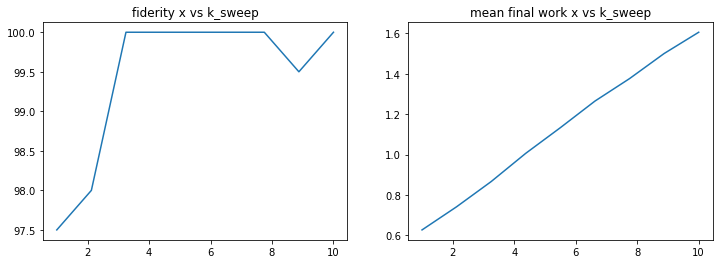

In [68]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# tau_sweep

In [72]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      np.linspace(0.5, 5, 8),
    "depth":    1,
    "location": 1
}

# how long the protocol, relation between tau and k

parameter = "tau"
label = "tau_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_0.5_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10015 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.6101772705455206
========== finished (1/8) ==========
========== start (2/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.1429_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10054 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.591708286806516
========== finished (2/8) ==========
========== start (3/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.7857_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.

tau_sweep
[0.5, 1.1428571428571428, 1.7857142857142858, 2.428571428571429, 3.0714285714285716, 3.7142857142857144, 4.357142857142858, 5.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.6101772705455206, 1.591708286806516, 1.588608025018252, 1.5836997118860727, 1.6059757771146148, 1.5851443348030336, 1.5964280268061113, 1.5817001545714713]


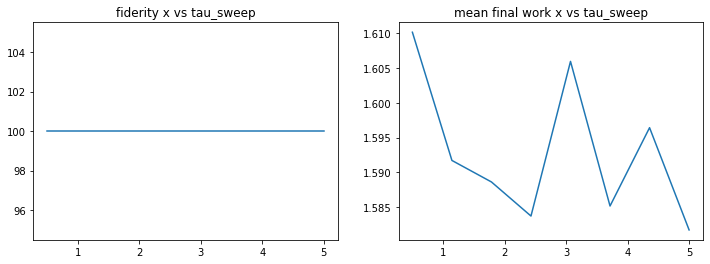

In [73]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# depth sweep

In [74]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    np.linspace(1, 4, 9),
    "location": 1
    
}

label = "depth_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10038 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.5865613504873617
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.375_location_1

 initializing...
the parameters:  [(1.375, 1.375), (-5.5, -5.5)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10024 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.64353492143105
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.75_location_1

 initializing...

depth_sweep
[1.0, 1.375, 1.75, 2.125, 2.5, 2.875, 3.25, 3.625, 4.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.5865613504873617, 1.64353492143105, 1.7132574941446614, 1.7929137924154093, 1.883721828964067, 1.956253088450803, 2.0408294526562636, 2.1200584370422066, 2.192951972771929]


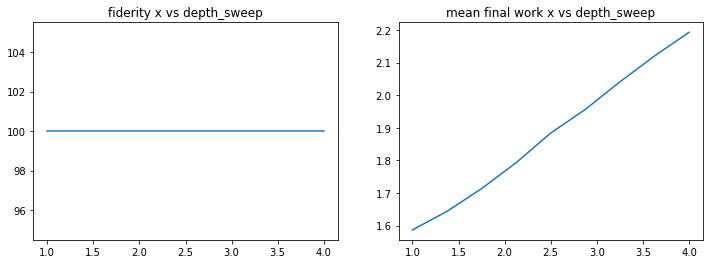

In [75]:
parameter = "depth"
label = "depth_sweep"

heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

# location sweep

In [76]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": np.linspace(1, 3, 9)
    
}

parameter = "location"
label = "location_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True)

========== start (1/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10010 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 99.5
meanFinalWork = 1.594692948896861
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.25

 initializing...
the parameters:  [(0.4096, 0.4096), (-2.56, -2.56)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10081 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 2.477828607728142
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.5

 initializing..

location_sweep
[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
[99.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.594692948896861, 2.477828607728142, 3.2099632946331775, 3.5285106057306184, 3.5684419576044952, 3.5368292058904918, 3.41562711025522, 3.296387108470399, 3.22639861878555]


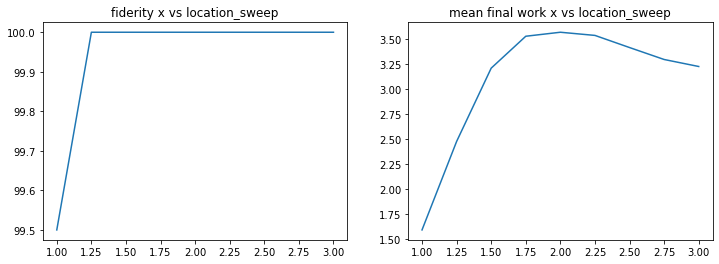

In [77]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label)

In [660]:
%%time
bfr.run_sim(verbose=True)


 initializing...
 found 5001 samples out of 5000
 running sim...

 analyzing output...
CPU times: user 549 ms, sys: 68.4 ms, total: 617 ms
Wall time: 708 ms


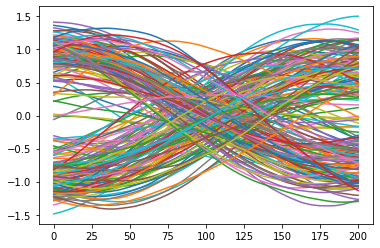

In [662]:
#here is a quick trajectory trace
allstate = bfr.sim.output.all_state['states']
plt.plot(allstate[:,:,0,0].transpose());

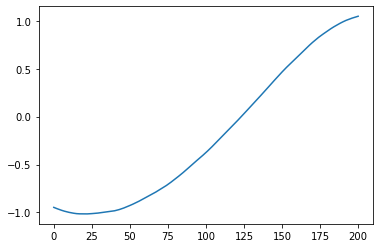

In [670]:
plt.plot(allstate[0,:,0,0]);

In [ ]:
def setup_sim(system, init_state, procedures=None, sim_params=None, dt=1/200, damping=1, temp=1, extra_time=1):
    print(f" system: {system},\n init_state: {init_state},\n procedures: {procedures},\n " +
          f"sim_params: {sim_params},\n dt: {dt},\n damping: {damping},\n" +
          f" temp: {temp},\n extra_time: {extra_time}")
    
sim_kwargs = {'damping': "damping",
          'temp': "T", 
          'dt':"dt", 
          'procedures':"proceudures",
          'sim_params': [1, 1, 0]
         }

setup_sim("system", "init_state", **sim_kwargs)

In [85]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR

# generate some sample data
np.random.seed(123)
data = np.random.randn(100, 2)
df = pd.DataFrame(data, columns=['X', 'Y'])

# fit a VAR model to the data
model = VAR(df)
results = model.fit()

# test for Granger causality from X to Y
test_result = results.test_causality(['X'], ['Y'], kind='f')

# print the test result
print('Granger causality from X to Y:', test_result.pvalue)

Granger causality from X to Y: 0.8297989774089181


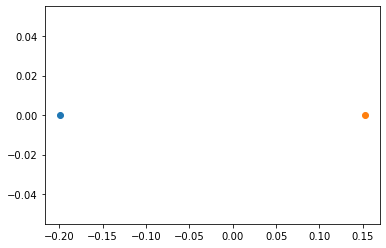

In [111]:
plt.scatter(bfr.sim.output.all_state["states"][1, 0, 0, 0], 0);
plt.scatter(bfr.sim.output.all_state["states"][1, -1, 0, 0], 0);


In [110]:
bfr.sim.output.all_state["states"][0, 0,...]

array([[1.40129021, 0.1007816 ]])

# testing for probability distribution

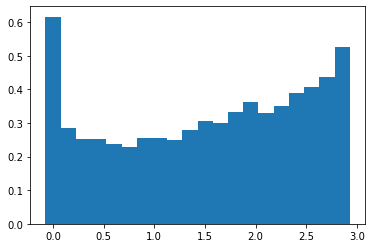

In [349]:
# Generate some random data

# Compute the histogram
hist, bins = np.histogram(bfr.sim.output.final_W, bins=20, density=False)

# Normalize the histogram to obtain a probability distribution
bin_widths = np.diff(bins)
probabilities = hist / (np.sum(hist) * bin_widths)

# Plot the probability distribution
plt.bar(bins[:-1], probabilities, width=bin_widths)

plt.show()

In [368]:
sim

NameError: name 'sim' is not defined

In [442]:
Y = np.random.normal(2, 10, 10)
print(Y)

[10.67865942 -3.53373134 12.79520484 -6.01217812 -2.44346863 13.749796
  2.09812298 -5.68272716  0.92219143  2.85018184]


In [443]:
X = np.linspace(0, len(Y)-1, len(Y), dtype = int)

In [454]:
index = np.r_[Y[:-1] < Y[1:]]

In [465]:
X[np.r_[Y[:-1] < Y[1:], False]]

array([1, 3, 4, 7, 8])

In [467]:
h = 6.63e-34
m = 32 * 1.67e-27
k_B = 1.38e-23
V = 10**-6

In [469]:
T = h**2 / (2*np.pi * m * k_B * V**(2/3))
print(T)

9.486404796380242e-16
